### Evolução da indexação SciELO Brasil
A descrição das regras e fontes de dados estão neste issue:

https://github.com/scieloorg/scielo_dltools/issues/24

In [1]:
import pandas as pd
import numpy as np

#### Carga do CSV com os metadados de documentos

In [2]:
df = pd.read_csv('documents_licenses.csv', low_memory=False, keep_default_na=False)

In [3]:
# Visualiza os 3 primeiros registros
df.head(3)

,extraction date,study unit,collection,ISSN SciELO,ISSN's,title at SciELO,title thematic areas,title is agricultural sciences,title is applied social sciences,title is biological sciences,...,title is health sciences,title is human sciences,"title is linguistics, letters and arts",title is multidisciplinary,title current status,document publishing ID (PID SciELO),document publishing year,document type,document is citable,document license
0,2022-02-09,document,scl,0100-879X,0100-879X;1414-431X,Brazilian Journal of Medical and Biological Re...,Biological Sciences;Health Sciences,0,0,1,...,1,0,0,0,current,S0100-879X1998000800006,1998,research-article,1,by/4.0
1,2022-02-09,document,scl,0100-879X,0100-879X;1414-431X,Brazilian Journal of Medical and Biological Re...,Biological Sciences;Health Sciences,0,0,1,...,1,0,0,0,current,S0100-879X1998000800011,1998,rapid-communication,1,by/4.0
2,2022-02-09,document,scl,0100-879X,0100-879X;1414-431X,Brazilian Journal of Medical and Biological Re...,Biological Sciences;Health Sciences,0,0,1,...,1,0,0,0,current,S0100-879X1998000800005,1998,research-article,1,by/4.0


In [4]:
# Total de Linhas e colunas
df.shape

(456482, 22)

In [5]:
# Nome das colunas
df.columns

Index(['extraction date', 'study unit', 'collection', 'ISSN SciELO', 'ISSN's',
       'title at SciELO', 'title thematic areas',
       'title is agricultural sciences', 'title is applied social sciences',
       'title is biological sciences', 'title is engineering',
       'title is exact and earth sciences', 'title is health sciences',
       'title is human sciences', 'title is linguistics, letters and arts',
       'title is multidisciplinary', 'title current status',
       'document publishing ID (PID SciELO)', 'document publishing year',
       'document type', 'document is citable', 'document license'],
      dtype='object')

In [6]:
# Filtra documentos a partir de 1997 (ano que se inicia o projeto SciELO) em novo DataFrame
ndf = df[df['document publishing year'] >= 1997]

In [7]:
# Total de Linhas e colunas
ndf.shape

(428724, 22)

In [8]:
gb_docs_issn = ndf.groupby(['ISSN SciELO','document publishing year']).count()\
             .unstack(fill_value=0).stack()['document publishing ID (PID SciELO)']
gb_docs_issn

ISSN SciELO  document publishing year
0001-3714    1997                         0
             1998                        33
             1999                        64
             2000                         0
             2001                         0
                                         ..
2676-0029    2020                         0
             2021                        41
             2022                         0
             2023                         0
             2024                         0
Name: document publishing ID (PID SciELO), Length: 10892, dtype: int64

In [9]:
type(gb_docs_issn)

pandas.core.series.Series

In [10]:
# Converte o objeto tipo Series (do groupby) em DataFrame
docs_issn = pd.DataFrame(gb_docs_issn.to_frame().to_records())
docs_issn

,ISSN SciELO,document publishing year,document publishing ID (PID SciELO)
0,0001-3714,1997,0
1,0001-3714,1998,33
2,0001-3714,1999,64
3,0001-3714,2000,0
4,0001-3714,2001,0
...,...,...,...
10887,2676-0029,2020,0
10888,2676-0029,2021,41
10889,2676-0029,2022,0
10890,2676-0029,2023,0


In [11]:
# Renomeia colunas para facilitar o uso posteriormente
docs_issn.rename(columns={'ISSN SciELO': 'issn_scielo', 
                          'document publishing year':'publication_year', 
                          'document publishing ID (PID SciELO)':'docs_count'}, inplace=True)
docs_issn

,issn_scielo,publication_year,docs_count
0,0001-3714,1997,0
1,0001-3714,1998,33
2,0001-3714,1999,64
3,0001-3714,2000,0
4,0001-3714,2001,0
...,...,...,...
10887,2676-0029,2020,0
10888,2676-0029,2021,41
10889,2676-0029,2022,0
10890,2676-0029,2023,0


#### Carga do CSV com os anos de entrada e saída dos periódicos

In [12]:
dfio = pd.read_csv('index_scielo_scielo-year-of-entry-exit-bra.csv')
dfio

,issn_scielo,journal,year_of_entry,exit_year
0,0102-6720,ABCD. Arquivos Brasileiros de Cirurgia Digesti...,2010,NaN
1,0044-5967,Acta Amazonica,2004,NaN
2,0102-3306,Acta Botanica Brasilica,2001,NaN
3,0102-8650,Acta Cirúrgica Brasileira,1998,NaN
4,2179-975X,Acta Limnologica Brasiliensia,2011,NaN
...,...,...,...,...
386,1983-7151,Turismo: Visão e Ação,2020,NaN
387,2175-3369,urbe. Revista Brasileira de Gestão Urbana,2013,NaN
388,0104-8775,Varia Historia,2007,NaN
389,1809-4341,Vibrant: Virtual Brazilian Anthropology,2012,NaN


In [13]:
# Garante tipagem Int para exit_year e troca NaN por Zero
dfio['exit_year'] = pd.to_numeric(dfio['exit_year'], errors='coerce')
dfio['exit_year'] = dfio['exit_year'].fillna(0).astype(int)
dfio['exit_year'].unique()

array([   0, 2015, 2009, 2001, 2014, 2012, 2020, 1997, 2019, 2016, 2017,
       2011, 2013, 2005, 2004, 2007, 2010, 2003, 2002, 2021, 1999, 2018,
       2000, 2008])

In [14]:
dfio

,issn_scielo,journal,year_of_entry,exit_year
0,0102-6720,ABCD. Arquivos Brasileiros de Cirurgia Digesti...,2010,0
1,0044-5967,Acta Amazonica,2004,0
2,0102-3306,Acta Botanica Brasilica,2001,0
3,0102-8650,Acta Cirúrgica Brasileira,1998,0
4,2179-975X,Acta Limnologica Brasiliensia,2011,0
...,...,...,...,...
386,1983-7151,Turismo: Visão e Ação,2020,0
387,2175-3369,urbe. Revista Brasileira de Gestão Urbana,2013,0
388,0104-8775,Varia Historia,2007,0
389,1809-4341,Vibrant: Virtual Brazilian Anthropology,2012,0


### Concatena DataFrames
Agrega a docs_issn os anos de entrada e saída do periódico criando assim um novo DF

In [15]:
cdf = pd.concat([pd.merge(docs_issn, dfio, how='inner', on='issn_scielo')])
cdf

,issn_scielo,publication_year,docs_count,journal,year_of_entry,exit_year
0,0001-3714,1997,0,Revista de Microbiologia,1998,2000
1,0001-3714,1998,33,Revista de Microbiologia,1998,2000
2,0001-3714,1999,64,Revista de Microbiologia,1998,2000
3,0001-3714,2000,0,Revista de Microbiologia,1998,2000
4,0001-3714,2001,0,Revista de Microbiologia,1998,2000
...,...,...,...,...,...,...
10859,2676-0029,2020,0,Trends in Computational and Applied Mathematics,2021,0
10860,2676-0029,2021,41,Trends in Computational and Applied Mathematics,2021,0
10861,2676-0029,2022,0,Trends in Computational and Applied Mathematics,2021,0
10862,2676-0029,2023,0,Trends in Computational and Applied Mathematics,2021,0


### Aplica algoritmo para definir se Ativo no Ano

In [16]:
# Ativo ou Não Ativo
'''
SE (ano_entrada <= ano_publicacao AND (data_saida == None OR data_saida >= ano_publicacao) AND num_docs > 0):
  está ativo no ano (1)
SENÃO
  não está ativo no ano (0)
'''
cdf["active"] = np.where(
    (cdf['year_of_entry'] <= cdf['publication_year']) & 
    ((cdf['exit_year'] == 0) | (pd.to_numeric(cdf['exit_year']) >= cdf['publication_year'])) & 
    (cdf['docs_count'] > 0), 1, 0)

cdf

,issn_scielo,publication_year,docs_count,journal,year_of_entry,exit_year,active
0,0001-3714,1997,0,Revista de Microbiologia,1998,2000,0
1,0001-3714,1998,33,Revista de Microbiologia,1998,2000,1
2,0001-3714,1999,64,Revista de Microbiologia,1998,2000,1
3,0001-3714,2000,0,Revista de Microbiologia,1998,2000,0
4,0001-3714,2001,0,Revista de Microbiologia,1998,2000,0
...,...,...,...,...,...,...,...
10859,2676-0029,2020,0,Trends in Computational and Applied Mathematics,2021,0,0
10860,2676-0029,2021,41,Trends in Computational and Applied Mathematics,2021,0,1
10861,2676-0029,2022,0,Trends in Computational and Applied Mathematics,2021,0,0
10862,2676-0029,2023,0,Trends in Computational and Applied Mathematics,2021,0,0


#### Tabula Ativos
Filtra periódicos ativos e ano de publicação até o ano corrente.

Agrupa por ano de publicação e renomeia a coluna "issn_scielo" para "ativos".

In [17]:
ativos = pd.DataFrame(cdf[(cdf["active"] == 1)].groupby('publication_year').count()['issn_scielo'])
ativos.rename(columns={'issn_scielo':'ativos'}, inplace=True)
ativos

,ativos
publication_year,
1997,9
1998,27
1999,38
2000,54
2001,66
2002,91
2003,107
2004,120
2005,133


#### Tabula Indexados
Agrupa por ano de entrada

In [18]:
indexados = pd.DataFrame(dfio.groupby(['year_of_entry']).count()['issn_scielo'])
indexados

,issn_scielo
year_of_entry,
1997,10
1998,19
1999,12
2000,18
2001,13
2002,27
2003,18
2004,16
2005,15


Cria coluna "indexados" com o acumulado a cada ano.

Renomeia o index "year_of_entry" para "publication_year" para uso posterior;

Remove a coluna "issn_scielo"

In [19]:
indexados['indexados'] = indexados.issn_scielo.cumsum()
indexados.index.name='publication_year'
del indexados['issn_scielo']
indexados

,indexados
publication_year,
1997,10
1998,29
1999,41
2000,59
2001,72
2002,99
2003,117
2004,133
2005,148


#### Concatena Ativos e Indexados

Concatena pela ativos e indexados pela chave publication_year

In [20]:
tab = pd.concat([pd.merge(ativos, indexados, how='inner', on='publication_year')])
tab

,ativos,indexados
publication_year,,
1997,9,10
1998,27,29
1999,38,41
2000,54,59
2001,66,72
2002,91,99
2003,107,117
2004,120,133
2005,133,148


#### Desindexados
Desindexados é subtração de indexados de ativos

In [21]:
tab['desindexados'] = tab['indexados']-tab['ativos']
tab

,ativos,indexados,desindexados
publication_year,,,
1997,9,10,1
1998,27,29,2
1999,38,41,3
2000,54,59,5
2001,66,72,6
2002,91,99,8
2003,107,117,10
2004,120,133,13
2005,133,148,15


Renomeia o index "publication_year" para "ano_publicacao"

In [22]:
tab.index.name='ano_publicacao'
tab

,ativos,indexados,desindexados
ano_publicacao,,,
1997,9,10,1
1998,27,29,2
1999,38,41,3
2000,54,59,5
2001,66,72,6
2002,91,99,8
2003,107,117,10
2004,120,133,13
2005,133,148,15


#### Exporta para Excel para verificação

In [23]:
tab.to_excel("rc-fapesp-evolucao-indexacao.xlsx")

#### Plota gráfico para verificação

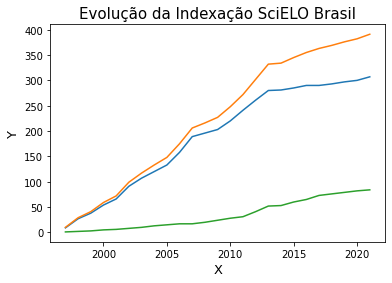

In [24]:
import matplotlib.pyplot as plt 

x=tab.index
y1=tab['ativos']
y2=tab['indexados']
y3=tab['desindexados']

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

plt.title("Evolução da Indexação SciELO Brasil",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.show()

#### Exporta para CSV para envio ao Data-Lake (gold)

In [25]:
tab.to_csv("rc-fapesp-evolucao-indexacao.csv")